# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

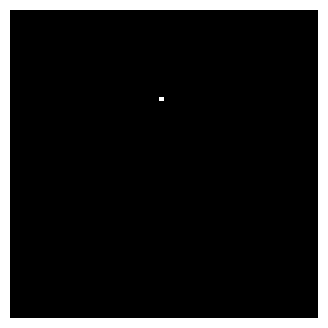

In [808]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [809]:
from skimage.transform import hough_line

h, theta, rho = hough_line(im)

In [810]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

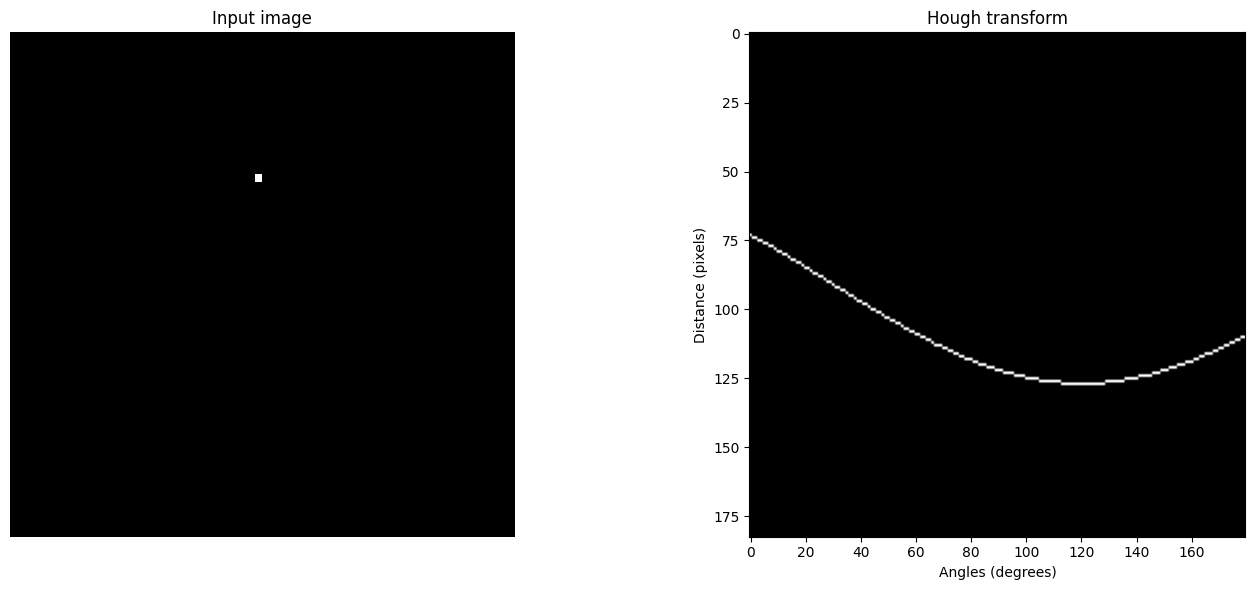

In [811]:
show_hough(h, im)

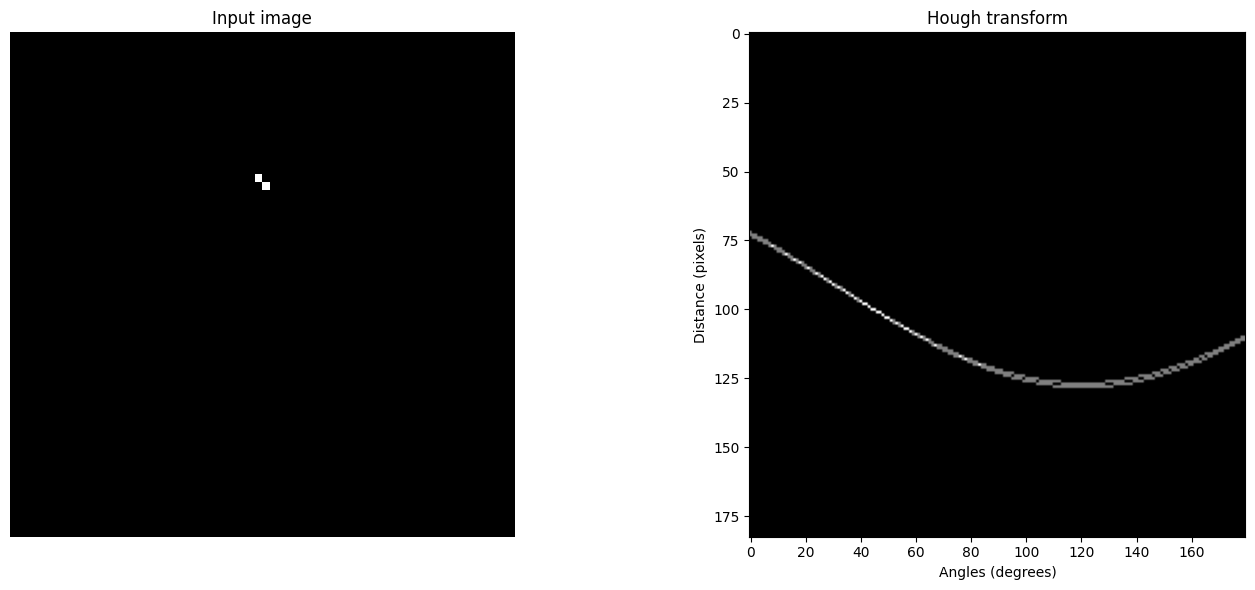

In [812]:
im[19, 32] = 1
h, theta, rho = hough_line(im)
show_hough(h, im)

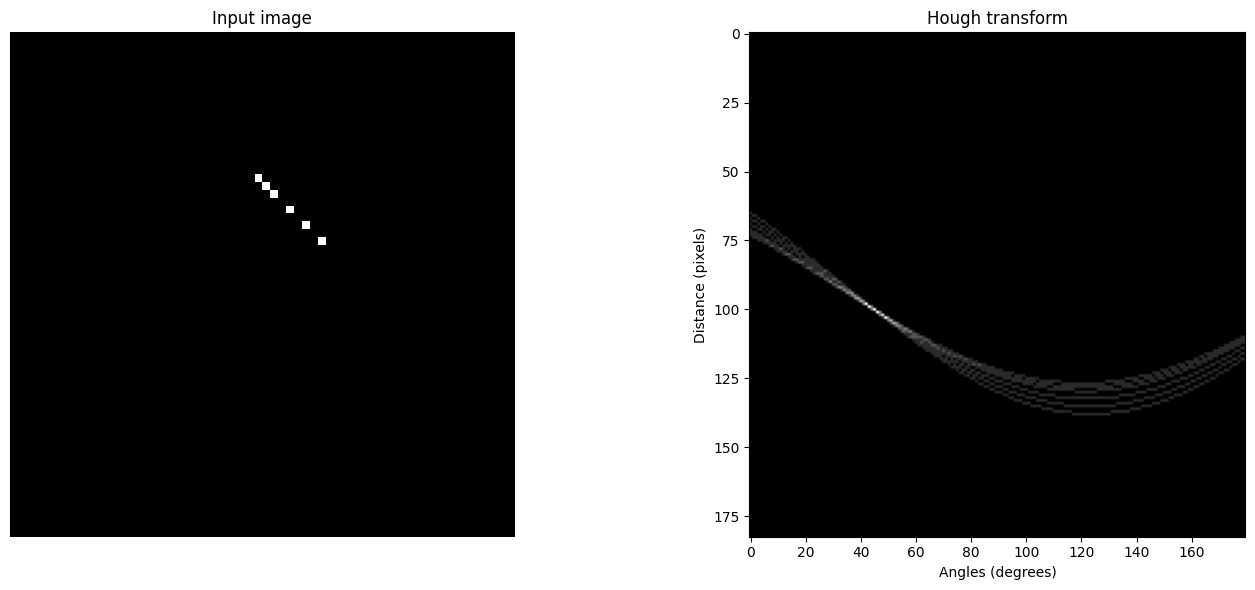

In [813]:
im[20, 33] = 1
im[22, 35] = 1
im[24, 37] = 1
im[26, 39] = 1
h, theta, rho = hough_line(im)
show_hough(h, im)

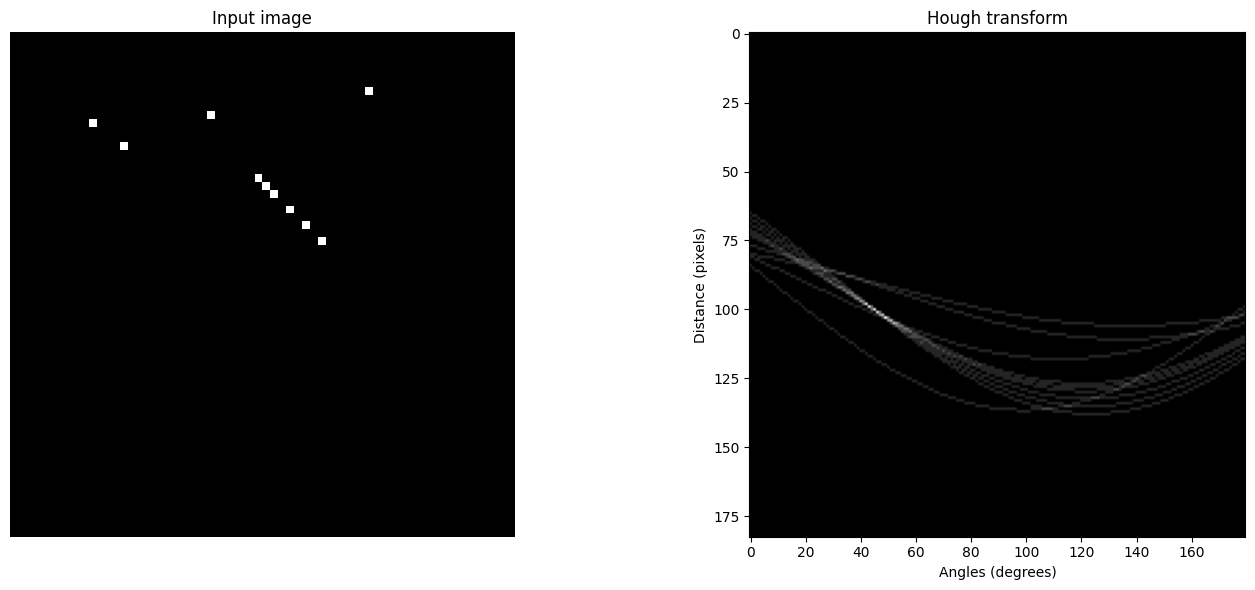

In [814]:
im[10, 25] = 1
im[7, 45] = 1
im[11, 10] = 1
im[14, 14] = 1
h, theta, rho = hough_line(im)
show_hough(h, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

C:\Users\Tomek\AppData\Local\Temp\ipykernel_12132\3895088172.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


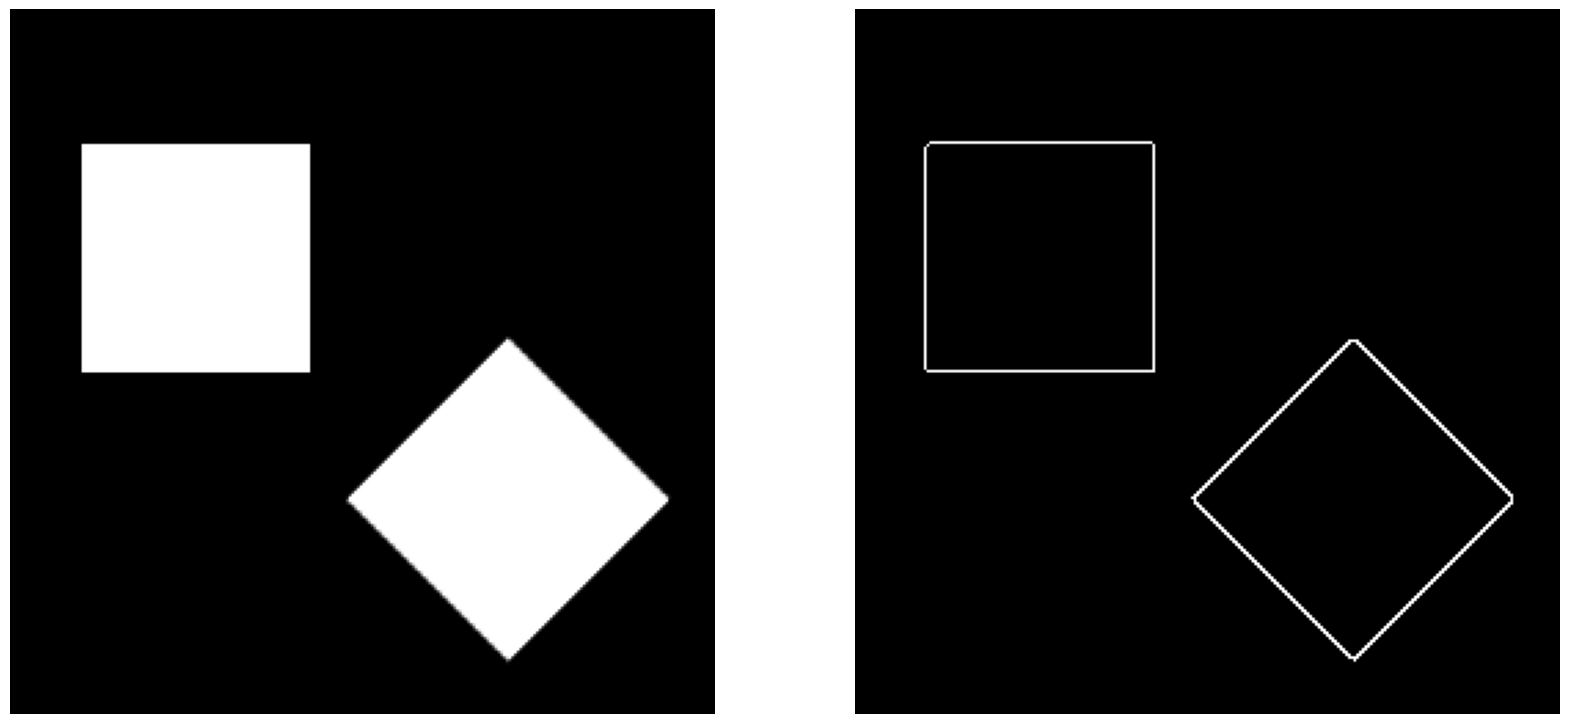

In [815]:
I_squares = cv2.imread("kwadraty.png")
squares_edges = cv2.Canny(I_squares, 100, 200, None)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(I_squares)
axs[0].axis("off")
axs[1].imshow(squares_edges, "gray")
axs[1].axis("off")

fig.show()

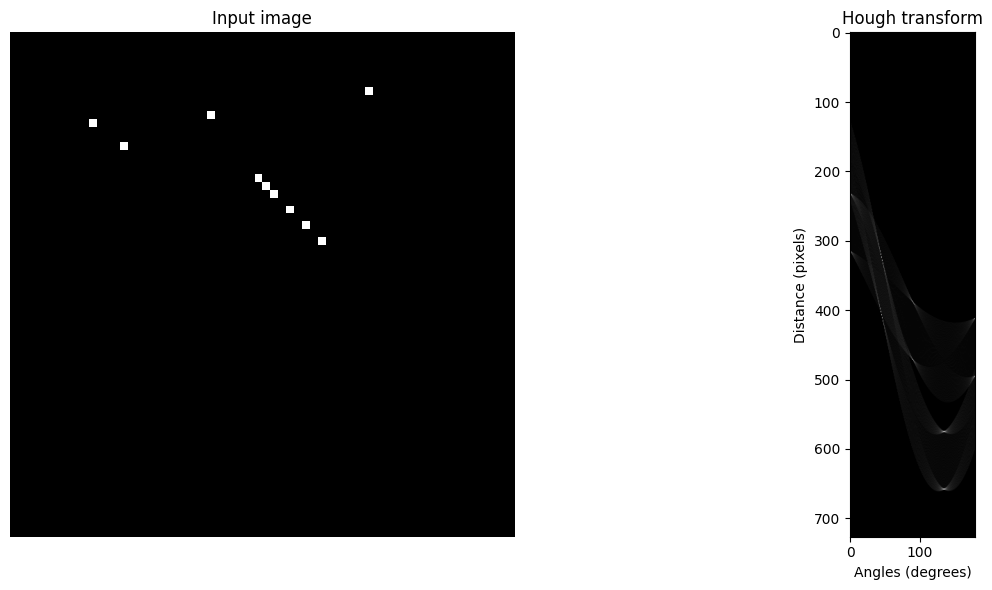

In [816]:
H, theta, rho = hough_line(squares_edges)
show_hough(H, im)

In [817]:
H_peaks, theta_peaks, rho_peaks = hough_line_peaks(H, theta, rho)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

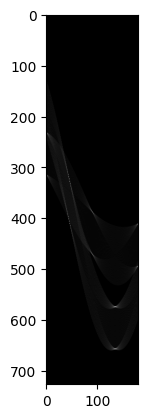

In [818]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

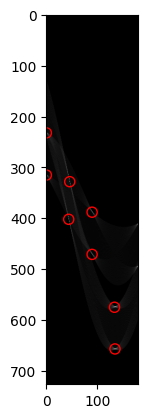

In [819]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha
for x, y in zip(theta_peaks, rho_peaks):
    x = np.argwhere(x == theta)
    y = np.argwhere(y == rho)
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)

plt.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

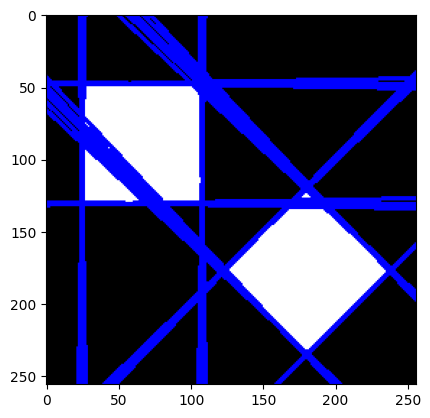

In [820]:
I_squares_lines = cv2.imread("kwadraty.png")
lines = cv2.HoughLines(squares_edges, 1, np.pi / 180, 40)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    rho, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(I_squares_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1)
ax.imshow(I_squares_lines)
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

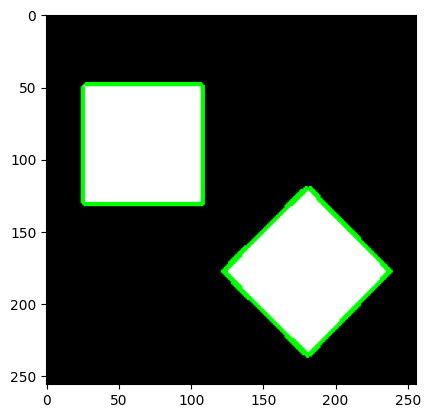

In [821]:
I_squares_lines = cv2.imread("kwadraty.png")
lines_list = []
lines = cv2.HoughLinesP(
    squares_edges,
    1,
    np.pi / 180,
    threshold=40,
    minLineLength=5,
    maxLineGap=10
)

for points in lines:
    x1, y1, x2, y2 = points[0]
    cv2.line(I_squares_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
    lines_list.append([(x1, y1), (x2, y2)])

fig, ax = plt.subplots(1)
ax.imshow(I_squares_lines)
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

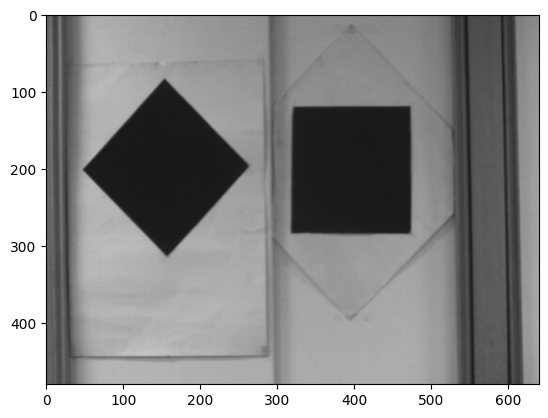

In [822]:
I_lab112 = cv2.imread("lab112.png")
fig, ax = plt.subplots(1)
ax.imshow(I_lab112)
plt.show()

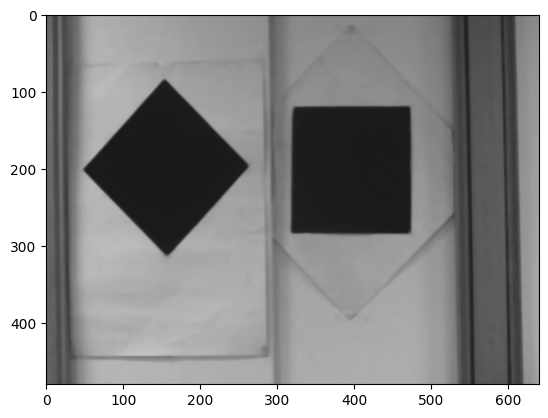

In [823]:
I_lab112 = cv2.medianBlur(I_lab112, 5)
fig, ax = plt.subplots(1)
ax.imshow(I_lab112)
plt.show()

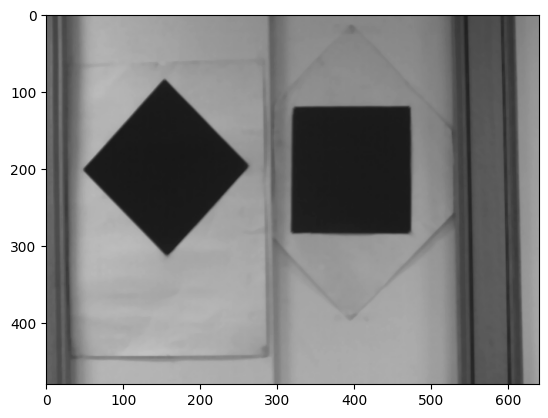

In [824]:
I_lab112 = cv2.morphologyEx(I_lab112, cv2.MORPH_OPEN, np.ones((3, 3)))
fig, ax = plt.subplots(1)
ax.imshow(I_lab112)
plt.show()

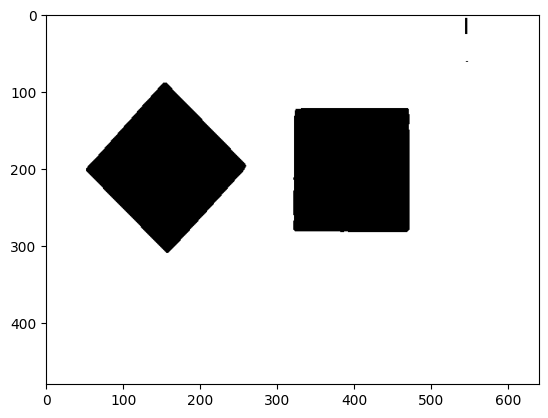

In [825]:
I_lab112 = cv2.normalize(I_lab112, None, 0, 255, cv2.NORM_MINMAX)
ret, I_lab112 = cv2.threshold(I_lab112, 15, 255, cv2.THRESH_BINARY)
I_lab112 = I_lab112.astype("uint8")
fig, ax = plt.subplots(1)
ax.imshow(I_lab112)
plt.show()

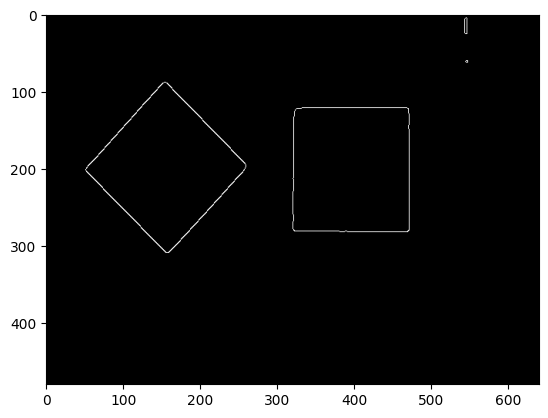

In [826]:
lab112_edges = cv2.Canny(I_lab112, 100, 200, None)
fig, ax = plt.subplots(1)
ax.imshow(lab112_edges, 'gray')
plt.show()

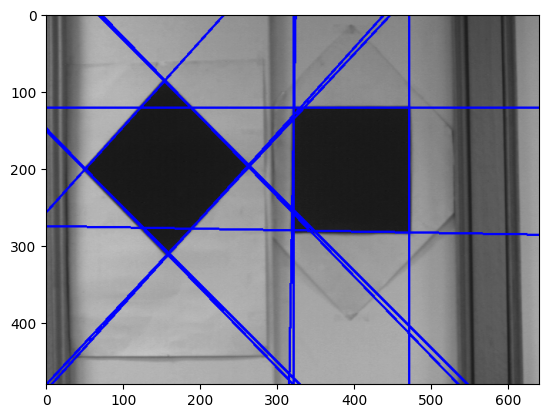

In [827]:
I_lab112_lines = cv2.imread("lab112.png")
lines = cv2.HoughLines(lab112_edges, 1, np.pi / 180, 90)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    rho, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(I_lab112_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1)
ax.imshow(I_lab112_lines)
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

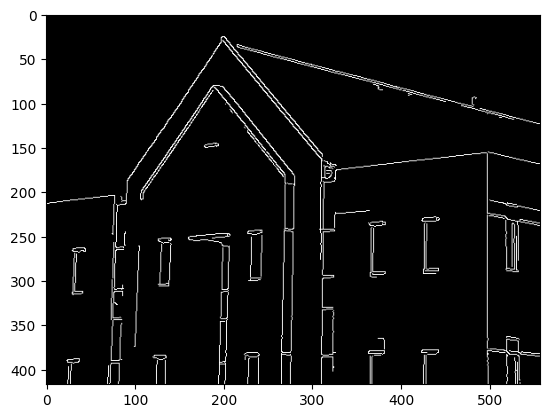

In [828]:
I_house = cv2.imread("dom.png")
I_house_blur = cv2.GaussianBlur(I_house, (3, 3), 0)
house_edges = cv2.Canny(I_house_blur, 100, 200, None, 3, 1)
fig, ax = plt.subplots(1)
ax.imshow(house_edges, 'gray')
plt.show()

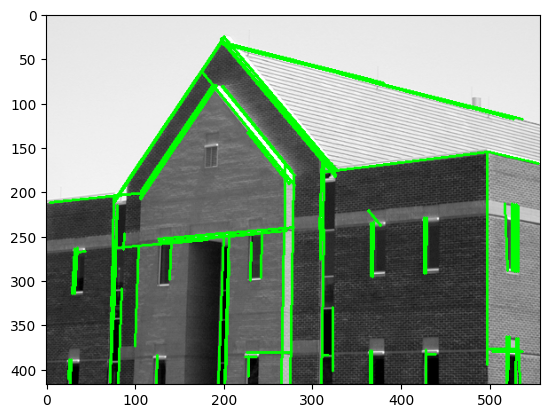

In [829]:
I_house_lines = cv2.imread("dom.png")
lines_list = []
lines = cv2.HoughLinesP(
    house_edges,
    1,
    np.pi / 180,
    threshold=40,
    minLineLength=5,
    maxLineGap=30
)

for points in lines:
    x1, y1, x2, y2 = points[0]
    cv2.line(I_house_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
    lines_list.append([(x1, y1), (x2, y2)])

fig, ax = plt.subplots(1)
ax.imshow(I_house_lines)
plt.show()